In [3]:
'''메인 라이브러리'''
import pandas as pd
import numpy as np
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
# 기본 색상으로 설정
color = sns.color_palette()
import matplotlib as mpl

'''데이터 준비 관련 라이브러리'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

'''알고리즘 관련 라이브러리'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# 데이터 미리보기

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.shape)
print(data.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

# 데이터 살펴보기

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# 사기 거래 건수확인
print('사기 거래 건수 : ', data['Class'].sum())

사기 거래 건수 :  492


In [8]:
# nan 개수 확인
np.isnan(data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

nan 값은 없다는걸 확인

In [9]:
# feature별 고유값 식별하기
data.apply(lambda x:len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

같은 시간대에 여러 거래가 있었다

# feature 행렬 및 label 배열 생성하기

피처 행렬 X 및 레이블 배열 Y 생성

In [10]:
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

피처 행렬 X 표준화하기  
평균이 0이고 표준 편차가 1이 되도록 표준화

In [11]:
featuresToScale = dataX.drop(['Time'], axis=1).columns

In [12]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [13]:
ss = pp.StandardScaler(copy=True)
dataX.loc[:, featuresToScale] = ss.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[ss.mean_, ss.scale_], index=['Mean', 'stDev'], columns=featuresToScale)

In [14]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
stDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


표준화가 완료된 모습이다

# feature 엔지니어링 및 feature 선택하기

상관관계 분석

In [15]:
correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)

In [16]:
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:, i], dataX.loc[:, j])[0], 2)

In [17]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,-0,-0,-0,0,0,0,-0,0,...,0,-0,0,0,-0,-0,-0,0,0,-0.23
V2,-0.01,-0,1,0,-0,0,0,-0,-0,-0,...,0,0,0,0,-0,0,0,-0,-0,-0.53
V3,-0.42,-0,0,1,-0,-0,0,0,-0,0,...,0,-0,-0,-0,0,0,-0,0,0,-0.21
V4,-0.11,-0,-0,-0,1,-0,-0,-0,0,0,...,-0,-0,0,0,0,0,-0,-0,-0,0.1
V5,0.17,0,0,-0,-0,1,0,0,0,0,...,-0,-0,0,0,-0,-0,0,0,-0,-0.39
V6,-0.06,0,0,0,-0,0,1,-0,-0,-0,...,0,-0,-0,0,-0,0,-0,-0,0,0.22
V7,0.08,0,-0,0,-0,0,-0,1,-0,0,...,0,0,-0,-0,-0,0,-0,-0,0,0.4
V8,-0.04,-0,-0,-0,0,0,-0,-0,1,0,...,0,0,0,0,-0,-0,0,0,-0,-0.1
V9,-0.01,0,-0,0,0,0,-0,0,0,1,...,-0,0,-0,-0,-0,0,-0,-0,0,-0.04


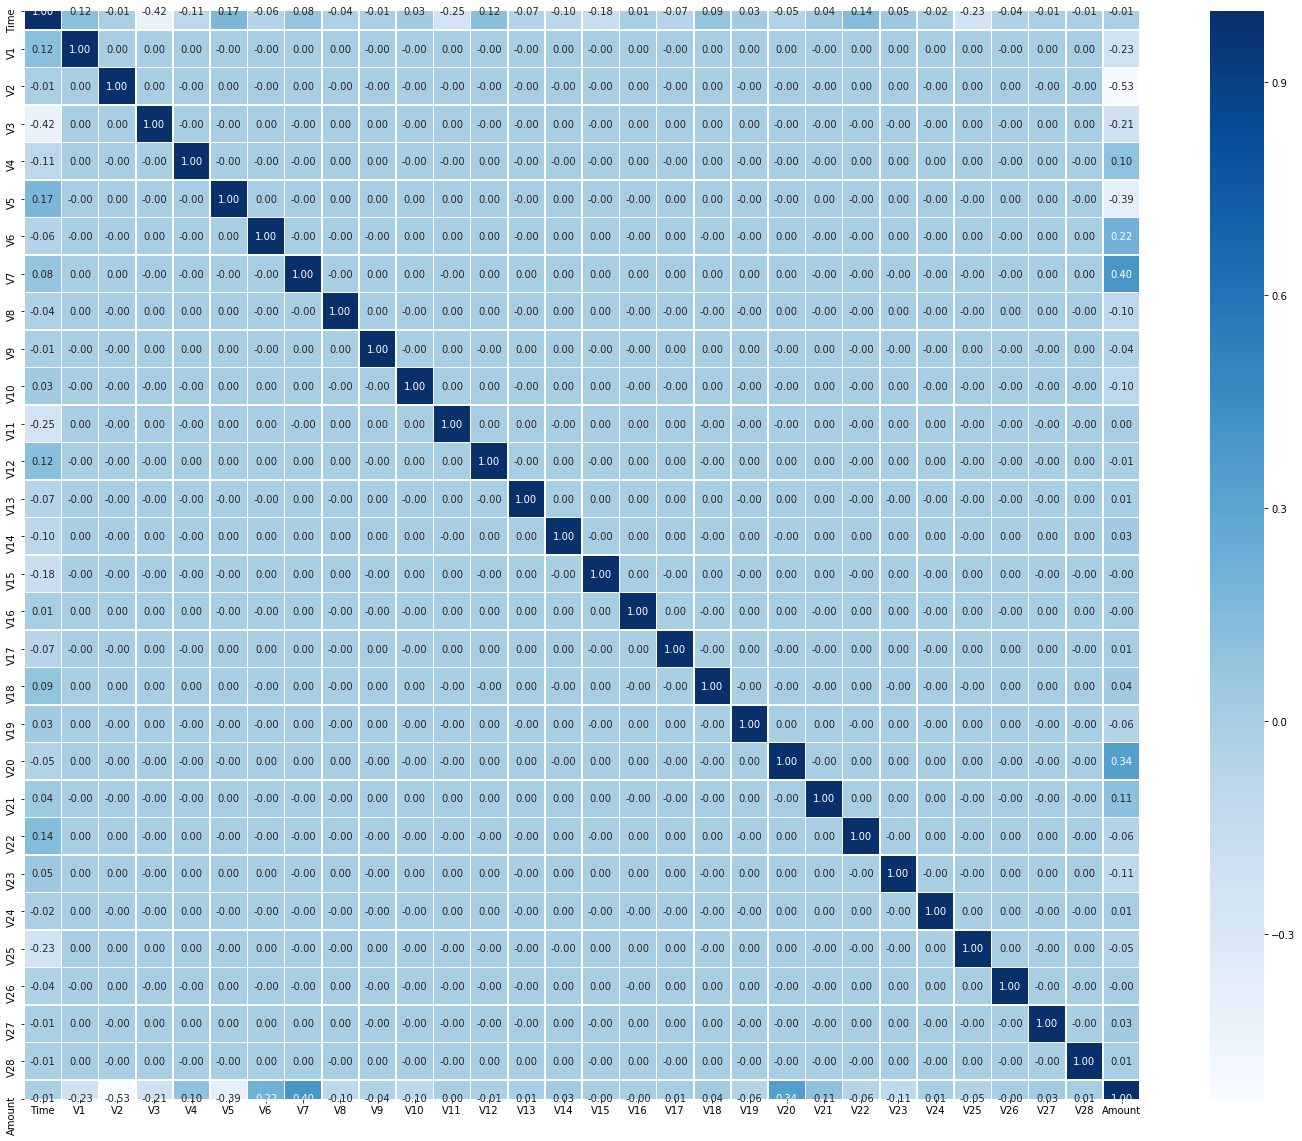

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(data=dataX.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# 데이터 레이블 시각화

In [19]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()

Text(0, 0.5, 'Frequency')

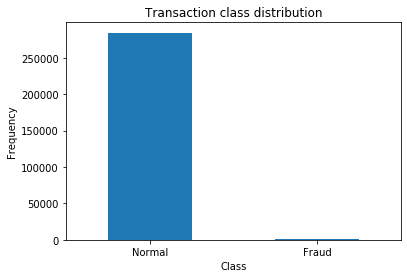

In [20]:
count_classes.plot(kind = 'bar', rot=0)
LABELS = ['Normal', 'Fraud']
plt.title('Transaction class distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

# 모델 검증하기

훈련 및 테스트 데이터 셋으로 분할

In [21]:
train_x, test_x, train_y, test_y = train_test_split(dataX, dataY, test_size=0.2, random_state=2018, stratify=dataY)

# 1) 로지스틱 회귀 분석

In [22]:
logReg = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', 
                            random_state=2018, solver='liblinear', n_jobs=1)

## K겹 교차검증 데이터셋 생성 (이 부분 이해 필요)

In [23]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

logloss_scores = []
model = logReg

for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    model.fit(X_train, y_train)
    
    # predict_proba를 통해 0~1 사이의 확률이 나온다
    predictions = model.predict_proba(X_val)
    
    logloss = log_loss(y_val, predictions)
    logloss_scores.append(logloss)
    print(f"FOLD {n_fold} : logloss : {logloss}")
    
mean_outcome = np.mean(logloss_scores)

print("Mean : {}".format(mean_outcome))

FOLD 0 : logloss : 0.11854350904293745
FOLD 1 : logloss : 0.10362370855691798
FOLD 2 : logloss : 0.10901237551561248
FOLD 3 : logloss : 0.10156447937265808
FOLD 4 : logloss : 0.09667766121308753
Mean : 0.10588434674024269


In [24]:
LABELS = ['Normal', 'Fraud']
pred_y = model.predict(test_x)

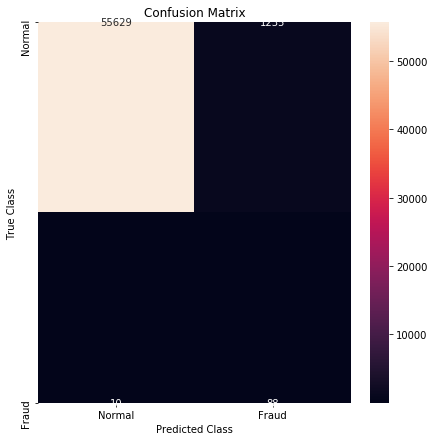

In [25]:
conf_matrix = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [26]:
f1_score(test_y.values, pred_y, average='macro')

0.5563950337819751